<a href="https://colab.research.google.com/github/vemularoshan/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

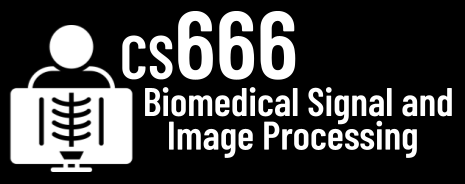
#Assignment 5

In [1]:
# NAME: ROSHAN VEMULA

In [2]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [6]:
# TODO: YOUR CODE
!wget https://cs666.org/data/ct.zip

--2024-04-16 03:28:23--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip’

ct.zip              100%[===================>]   5.58M  --.-KB/s    in 0.06s   

2024-04-16 03:28:23 (88.7 MB/s) - ‘ct.zip’ saved [5847706/5847706]



In [7]:
# Then use the following snippet to extract the data.

In [8]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [9]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [10]:
# TODO: YOUR_ANSWER 220

In [11]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [12]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

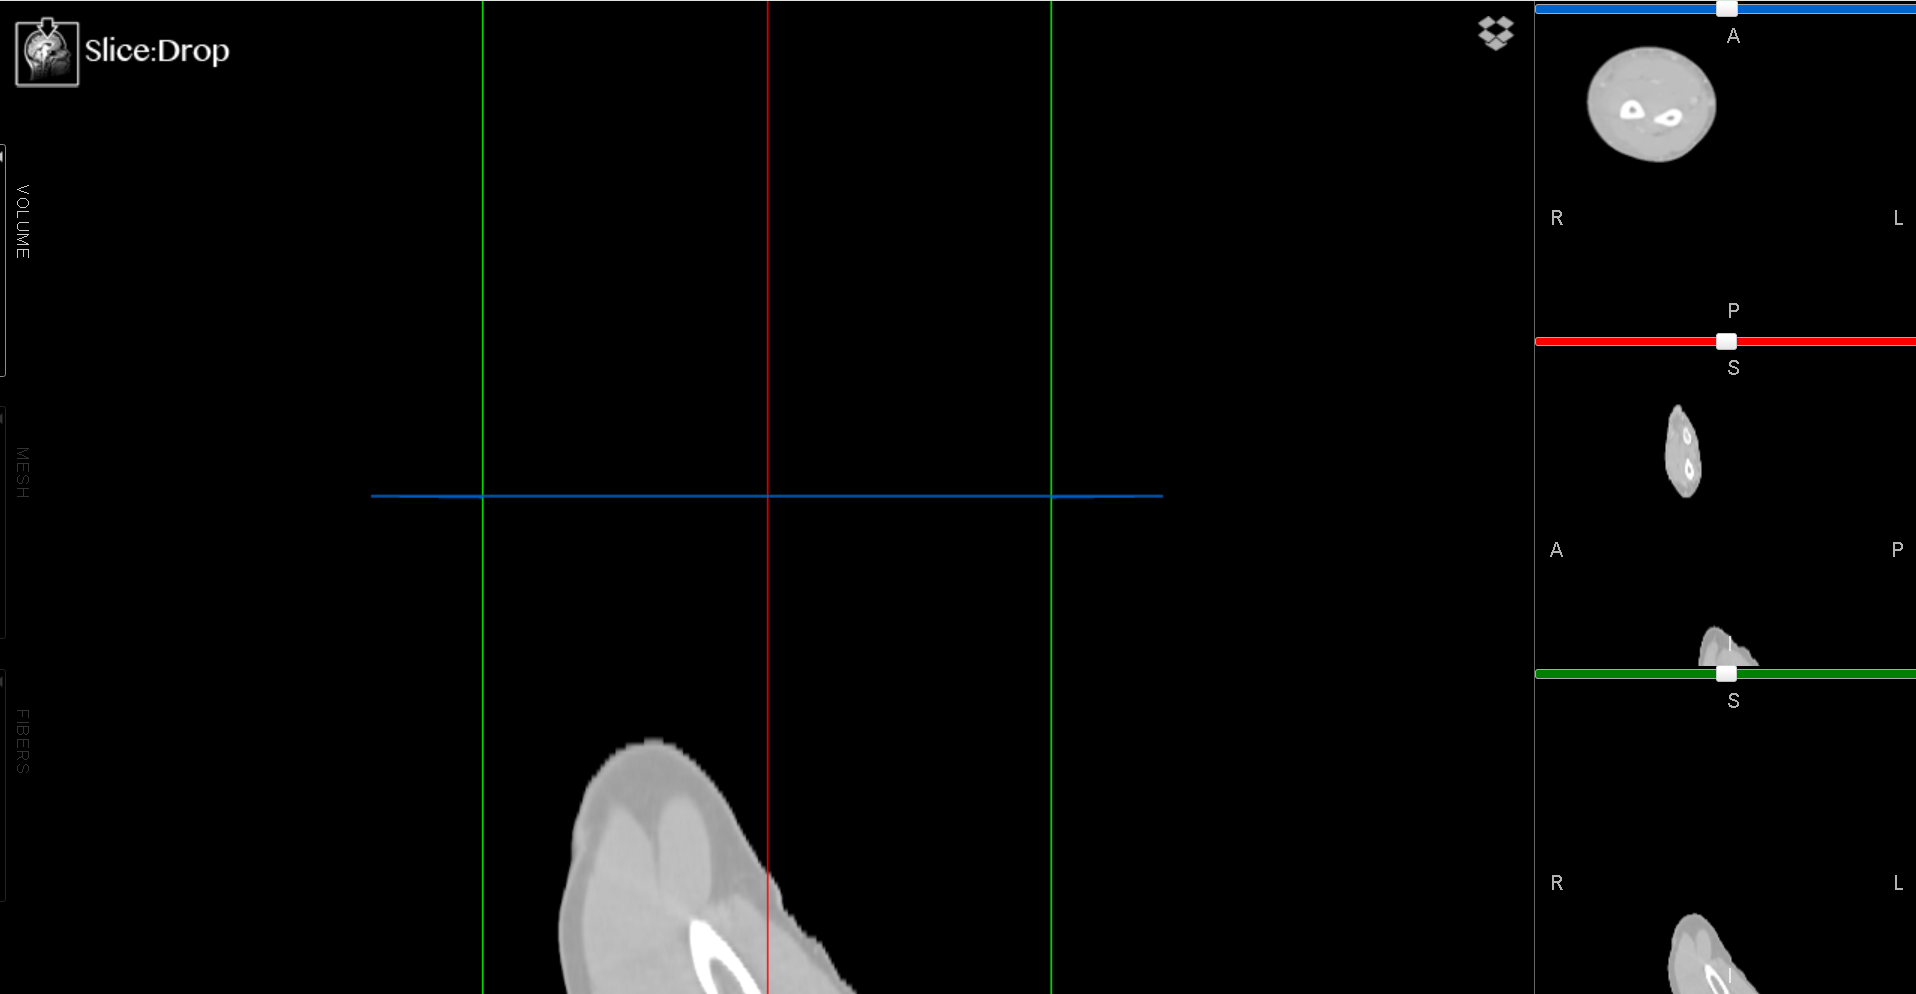

In [13]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [14]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

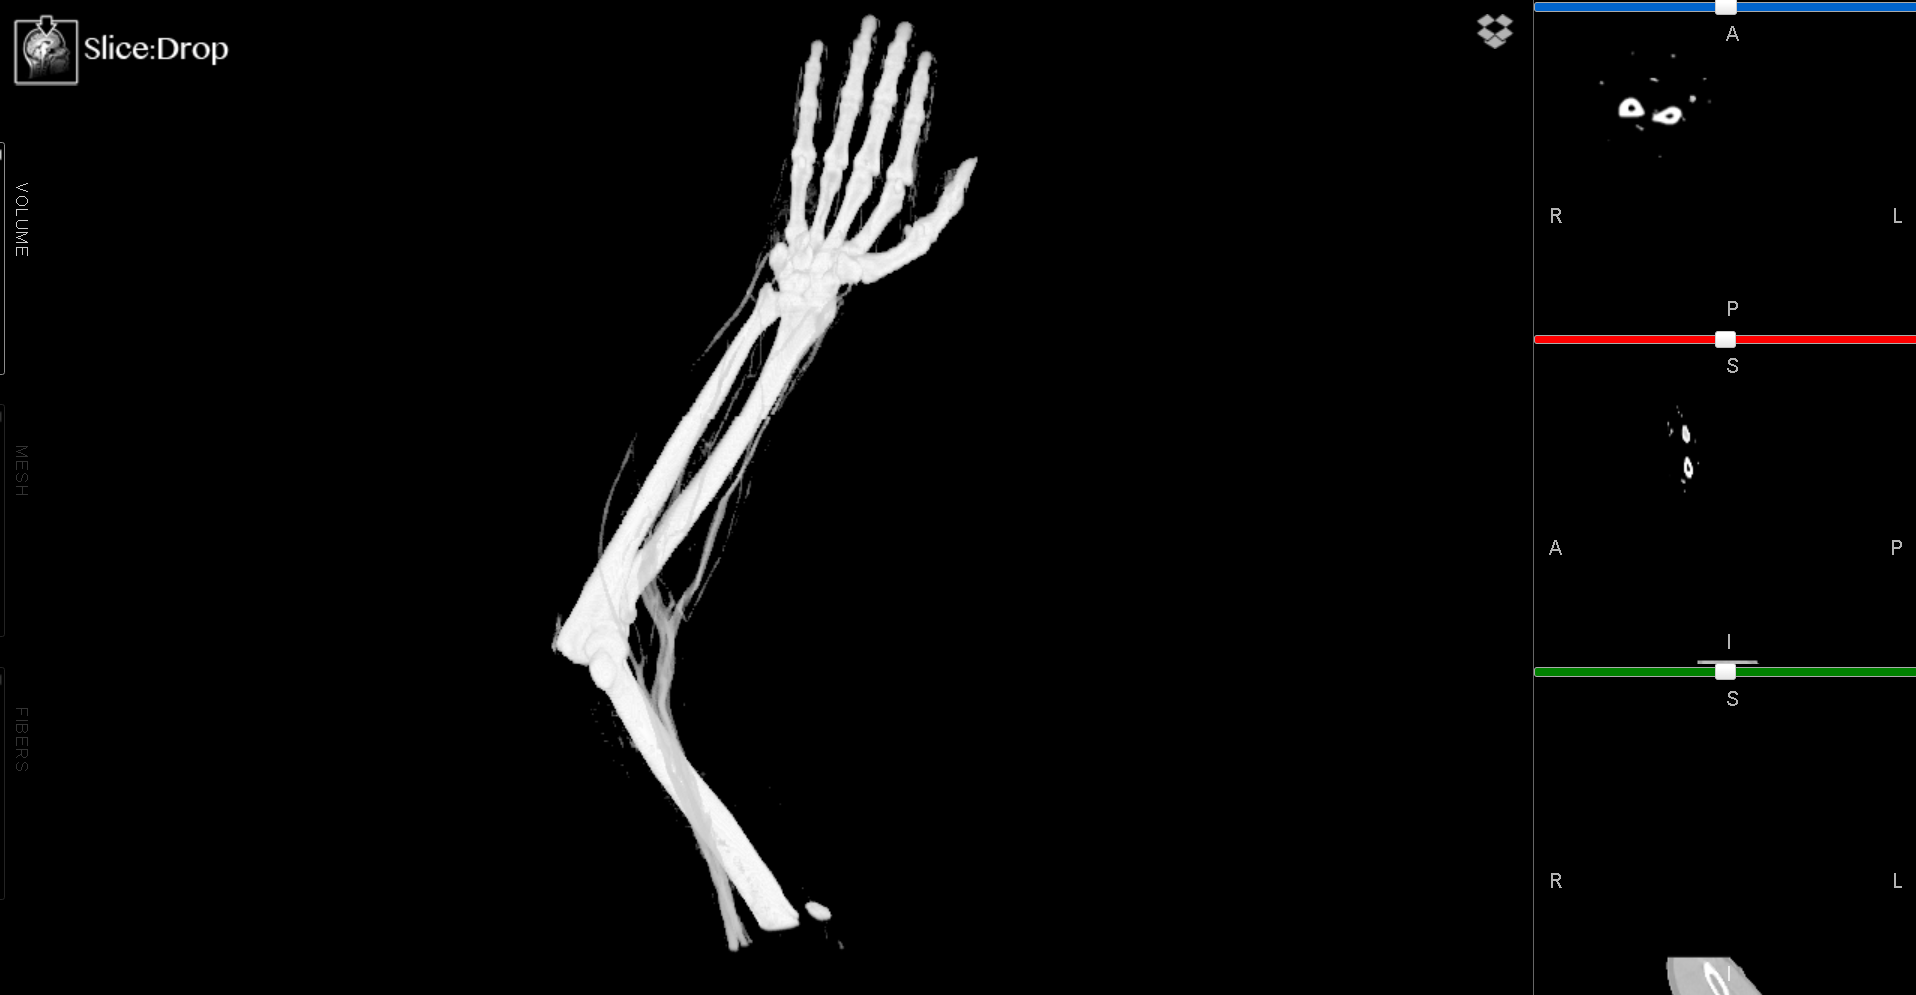

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [15]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [16]:
from pydicom import dcmread

In [17]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os

DIR = "ct"
dcmfiles = sorted(os.listdir(DIR))

dcm_list = [dcmread(os.path.join(DIR, dcm_file)) for dcm_file in dcmfiles]
imagevolume = np.array([dcm.pixel_array for dcm in dcm_list])

print(imagevolume.shape)


(220, 454, 512)


In [18]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

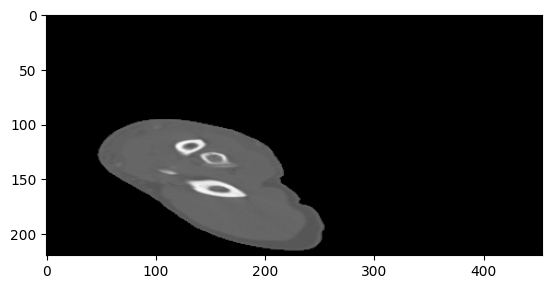

In [19]:
# TODO: YOUR CODE FOR AXIAL
axial_slice = imagevolume[:, :, 100]
plt.imshow(axial_slice, cmap='gray')
plt.show()

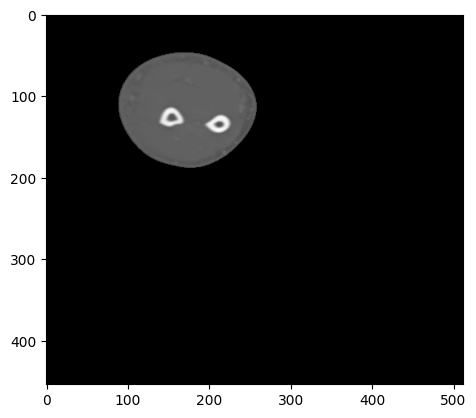

In [20]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal_slice = imagevolume[100, :, :]
plt.imshow(sagittal_slice, cmap='gray')
plt.show()

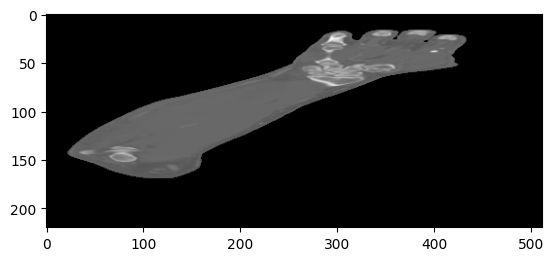

In [21]:
# TODO: YOUR CODE FOR CORONAL
coronal_slice = imagevolume[:, 100, :]
plt.imshow(coronal_slice, cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [22]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [23]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

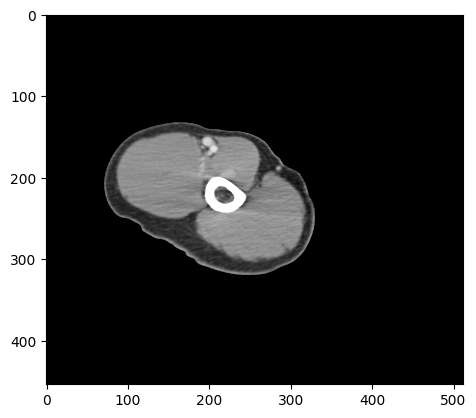

In [24]:
dicom_file = dcm_list[200]
window_center = dicom_file.WindowCenter
window_width = dicom_file.WindowWidth
rescale_intercept = dicom_file['RescaleIntercept'].value


vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [25]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

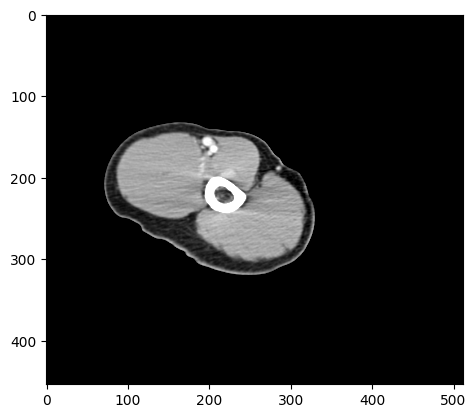

In [26]:
window_center = 10
window_width = 300
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

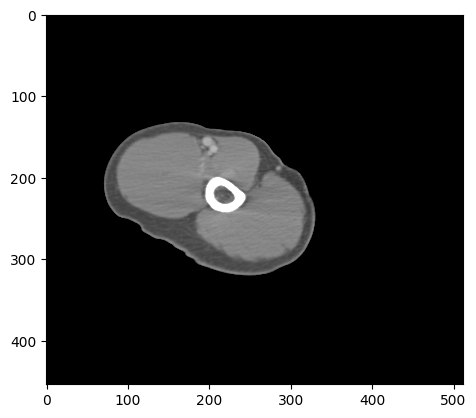

In [27]:
window_center = 40
window_width = 700
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

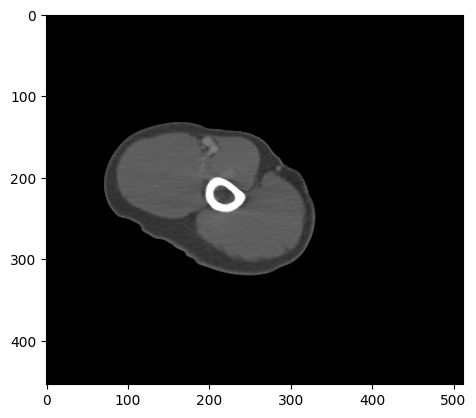

In [28]:
window_center = 190
window_width = 1000
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [29]:
# Which values make sense and why?

In [30]:
# TODO: YOUR ANSWER

In [31]:
#The statement suggests that #(10,300) is coherent because it provides intricate detail and vivid imagery, with distinct differences. Higher LEVEL values encompass a broader spectrum, whereas lower values concentrate on a more limited range

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [32]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [33]:

dir_path = "./ct"


file_names = os.listdir(dir_path)
file_names.sort()

first_file = dcmread(os.path.join(dir_path, file_names[0]))
rows = first_file.Rows
columns = first_file.Columns
num_slices = len(file_names)
window_center = first_file[0x0028, 0x1050].value
window_width = first_file[0x0028, 0x1051].value
rescale_intercept = first_file[0x0028, 0x1052].value


volume = np.zeros((rows, columns, num_slices), dtype=first_file.pixel_array.dtype)


for i, file_name in enumerate(file_names):
    file_path = os.path.join(dir_path, file_name)
    dicom_file = dcmread(file_path)
    volume[:, :, i] = dicom_file.pixel_array

volume_hu = volume * rescale_intercept + first_file.RescaleSlope

fat_mask = volume_hu.copy()
fat_mask[fat_mask > -60] = 0
fat_mask = np.int16(fat_mask)

tissue_mask = volume_hu.copy()
tissue_mask[tissue_mask < 1000] = 0
tissue_mask[tissue_mask > 2000] = 0
tissue_mask = np.int16(tissue_mask)

bone_mask = volume_hu.copy()
bone_mask[bone_mask < 300] = 0
bone_mask = np.int16(bone_mask)



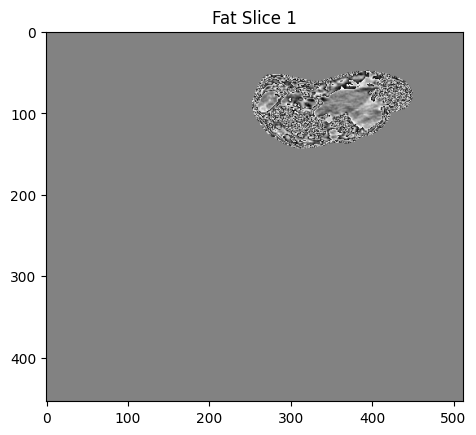

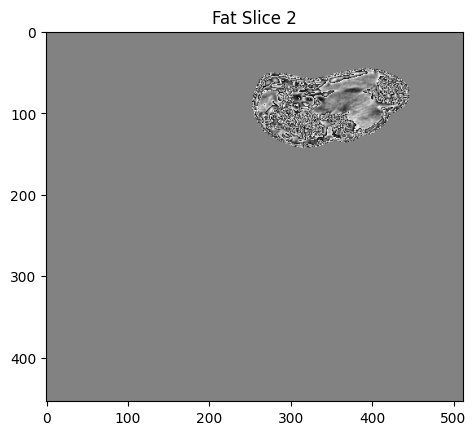

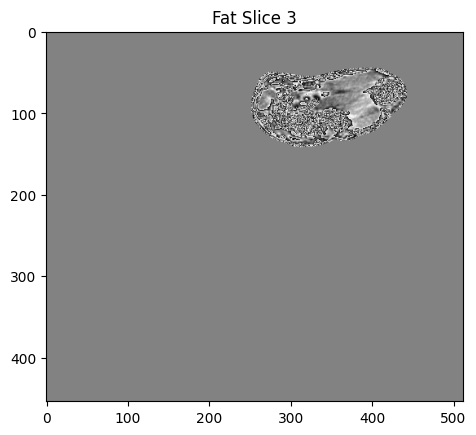

In [34]:
# TODO: YOUR CODE TO SEGMENT FAT
for i in range(3):
    plt.imshow(fat_mask[:, :, i+50], cmap='gray')
    plt.title("Fat Slice {}".format(i+1))
    plt.show()


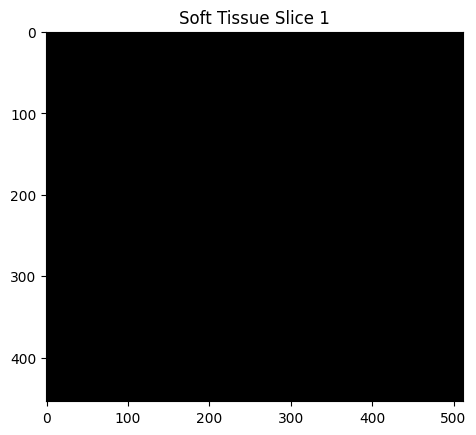

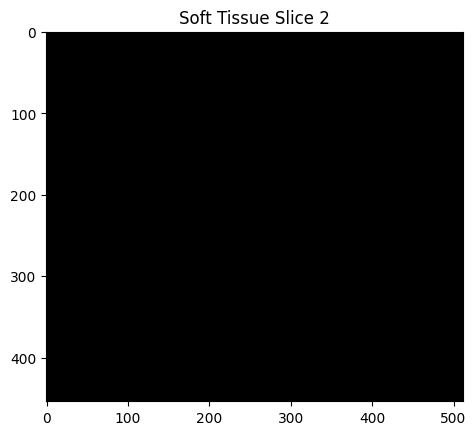

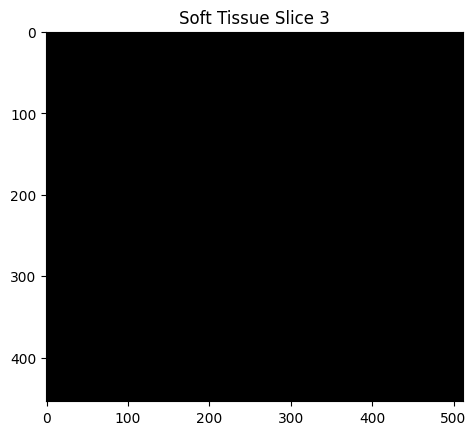

In [35]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
# Visualize each of the 3 slices per structure to showcase the segmentation
for i in range(3):
    plt.imshow(tissue_mask[:, :, i+50], cmap='gray')
    plt.title("Soft Tissue Slice {}".format(i+1))
    plt.show()


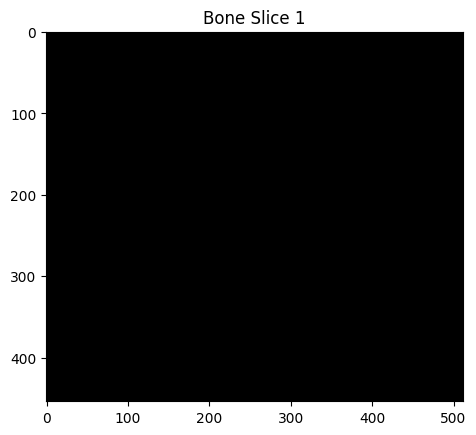

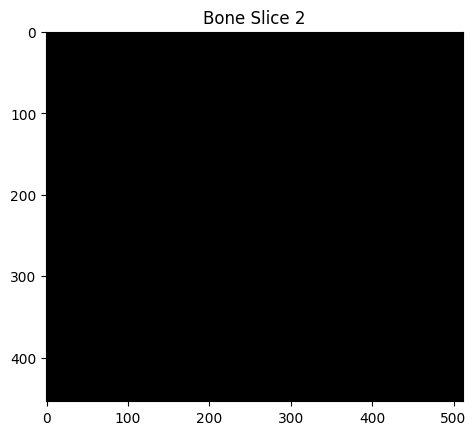

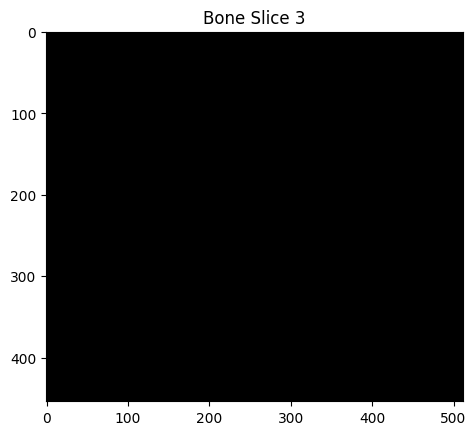

In [36]:
# TODO: YOUR CODE TO SEGMENT BONES
# Visualize each of the 3 slices per structure to showcase the segmentation
for i in range(3):
    plt.imshow(bone_mask[:, :, i+50], cmap='gray')
    plt.title("Bone Slice {}".format(i+1))
    plt.show()

In [37]:
# Are the segmentations good?

In [38]:
# TODO: YOUR ANSWER

In [39]:
#Yes for fat, but not good for soft tissue and bone.This may vary depending on HU values

In [40]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""